## Read Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

# This data is from September 9th. For the most up to date data go to:
# github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

global_data_file = os.path.join("confirmed cases data", "time_series_covid19_confirmed_global.csv")
global_data = pd.read_csv(global_data_file)

global_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033


## Aggregate Country Counds
Some countries have data for Provinces/States, so I'll just sum all of those so we have the total country counts.

In [3]:
global_data_summed = global_data.groupby('Country/Region').sum()

df = global_data_summed.drop(['Lat', 'Long'], axis = 1).reset_index() # Doesn't make sense to keep Lat/Long coloumns after dataframe has been summed
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520
1,Albania,0,0,0,0,0,0,0,0,0,...,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553
2,Algeria,0,0,0,0,0,0,0,0,0,...,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938
3,Andorra,0,0,0,0,0,0,0,0,0,...,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261
4,Angola,0,0,0,0,0,0,0,0,0,...,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033


## List out all the countries

In [4]:
# These are the country names we can pass into our plotting method
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

## Plot Confirmed Cases for Countries Over Time

Modify these values to change your graph (make sure to rerun this cell before running plot code)

In [5]:
countries_to_plot = ['US', 'China', 'United Kingdom', 'Germany', 'India']

# US Date format: 'MM/DD/YYYY'
start_date = '01/22/2020'
end_date = '09/09/2020'

Code to plot the data

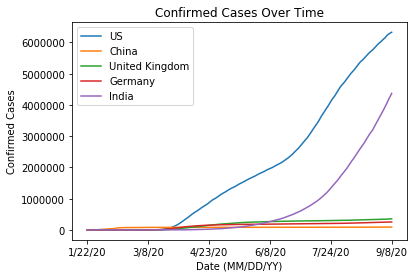

In [7]:
def get_index_from_date(date_string):
    FIRST_DATE = datetime.datetime(2020, 1, 22) # Don't modify this value
    
    date_list = [int(x) for x in date_string.split('/')]
    date_object = datetime.datetime(date_list[-1], date_list[0], date_list[1])
    
    return (date_object-FIRST_DATE).days

dates = list(df)[1:]

start_index = get_index_from_date(start_date)
end_index = get_index_from_date(end_date)

x_values = dates[start_index:end_index+1]

for country in countries_to_plot:
    country_df = df[df['Country/Region'] == country]
    y_values = [int(country_df[col]) for col in x_values]
    plt.plot(x_values, y_values, label=country)
    
plt.title('Confirmed Cases Over Time')
skip = max(len(x_values)//5, 1) # Helps ensure we don't add too many date tick marks
plt.xticks(x_values[::skip])
plt.xlabel("Date (MM/DD/YY)")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()